In [1]:
# manipular o conjunto de dados
import pandas as pd

# plotar gráficos
import matplotlib.pyplot as plt

# tratamento de dados
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# métodos de regressão
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

#métricas de erro
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('../input/imdb-5000-movie-dataset/movie_metadata.csv')
df.shape

(5043, 28)

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [5]:
df2 = df.drop(["actor_1_name", "actor_2_name", "actor_3_name", "genres", "movie_title", "plot_keywords", "movie_imdb_link", "language", "country", "director_name"], axis=1)
df2 = pd.get_dummies(df2, columns=["content_rating", "color"], drop_first=True)
df2.dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
gross                        float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
content_rating_G               uint8
content_rating_GP              uint8
content_rating_M               uint8
content_rating_NC-17           uint8
content_rating_Not Rated       uint8
content_rating_PG              uint8
content_rating_PG-13           uint8
content_rating_Passed          uint8
content_rating_R               uint8
content_rating_TV-14           uint8
content_rating_TV-G            uint8
c

(array([  16.,   38.,  102.,  222.,  579., 1158., 1515., 1085.,  307.,
          21.]),
 array([1.6 , 2.39, 3.18, 3.97, 4.76, 5.55, 6.34, 7.13, 7.92, 8.71, 9.5 ]),
 <BarContainer object of 10 artists>)

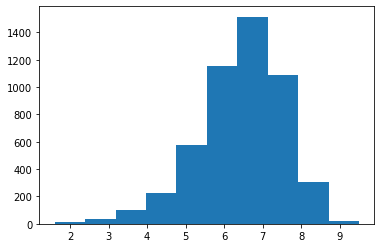

In [6]:
plt.hist(df["imdb_score"])

Text(0, 0.5, 'IMDB')

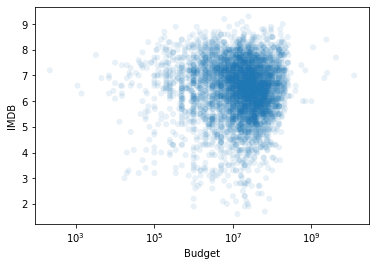

In [7]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(df["budget"], df["imdb_score"], alpha=0.1, edgecolors='none')
ax.set_xscale('log')
plt.xlabel("Budget")
plt.ylabel("IMDB")

In [8]:
y = df2["imdb_score"]
X = df2.drop("imdb_score", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=10)
print(y_train.shape, y_test.shape)

(3530,) (1513,)


In [9]:
reg = make_pipeline(SimpleImputer(strategy="most_frequent"), StandardScaler(), RandomForestRegressor(n_estimators=200, random_state=10))
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)

print('Erro médio absoluto: ', mean_absolute_error(y_train, y_train_pred))

Erro médio absoluto:  0.21289220963172814


Text(0, 0.5, 'IMDB (predição)')

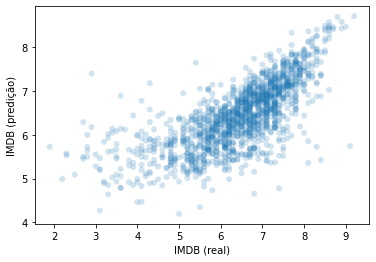

In [10]:
y_test_pred = reg.predict(X_test)
plt.scatter(y_test, y_test_pred, alpha=0.2, edgecolors='none')
plt.xlabel("IMDB (real)")
plt.ylabel("IMDB (predição)")

Erro médio absoluto:  0.5708483146067413


Text(0, 0.5, 'Quantidade')

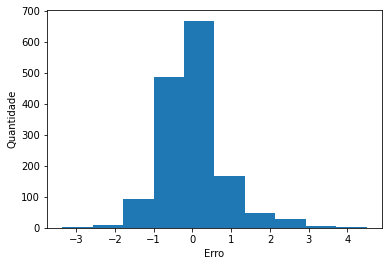

In [11]:
print('Erro médio absoluto: ', mean_absolute_error(y_test, y_test_pred))
err = y_test_pred - y_test

plt.hist(err)
plt.xlabel("Erro")
plt.ylabel("Quantidade")